In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np



In [2]:
MCDO_fp = './results/mcdo/'
BASE_fp = './results/base/'
DE_fp = './results/de/'
VI_fp = './results/vi/'
sample_sizes = [1, 5, 10, 50, 100, 2000, 4000]

mean_entropy_data = {
    'MCDO': {},
    'BASE': {},
    'DE': {},
    'VI': {}
}

std_entropy_data = {
    'MCDO': {},
    'BASE': {},
    'DE': {},
    'VI': {}
}

# Read data for each method and sample size and save to dictionary
for size in sample_sizes:
    with open(MCDO_fp + f'svhn_results_{size}_samples_mcdo.json') as f:
        mean_entropy_data['MCDO'][str(size)] = float(json.load(f)['mean_entropy'])
    with open(BASE_fp + f'svhn_results_{size}_samples_base.json') as f:
        mean_entropy_data['BASE'][str(size)] = float(json.load(f)['mean_entropy'])
    with open(VI_fp + f'svhn_results_{size}_samples_vi.json') as f:
        mean_entropy_data['VI'][str(size)] = float(json.load(f)['mean_entropy'])
    

for size in sample_sizes:
    with open(MCDO_fp + f'svhn_results_{size}_samples_mcdo.json') as f:
        std_entropy_data['MCDO'][str(size)] = float(json.load(f)['std_entropy'])
    with open(BASE_fp + f'svhn_results_{size}_samples_base.json') as f:
        std_entropy_data['BASE'][str(size)] = float(json.load(f)['std_entropy'])
    with open(VI_fp + f'svhn_results_{size}_samples_vi.json') as f:
        std_entropy_data['VI'][str(size)] = float(json.load(f)['std_entropy'])


# Deep Ensemble
for size in sample_sizes:
    # Create list if it doesn't exist
    if not str(size) in mean_entropy_data['DE']:
        mean_entropy_data['DE'][str(size)] = []

    temp = []
    for model_itr in range(1, 6):
        with open(DE_fp + f'svhn_results_{size}_samples_de_{model_itr}.json') as f:
            temp.append(float(json.load(f)['mean_entropy']))

    mean_entropy_data['DE'][str(size)] = np.mean(temp)


# std
for size in sample_sizes:
    # Create list if it doesn't exist
    if not str(size) in std_entropy_data['DE']:
        std_entropy_data['DE'][str(size)] = []

    temp = []
    for model_itr in range(1, 6):
        with open(DE_fp + f'svhn_results_{size}_samples_de_{model_itr}.json') as f:
            temp.append(float(json.load(f)['std_entropy']))

    std_entropy_data['DE'][str(size)] = np.mean(temp)

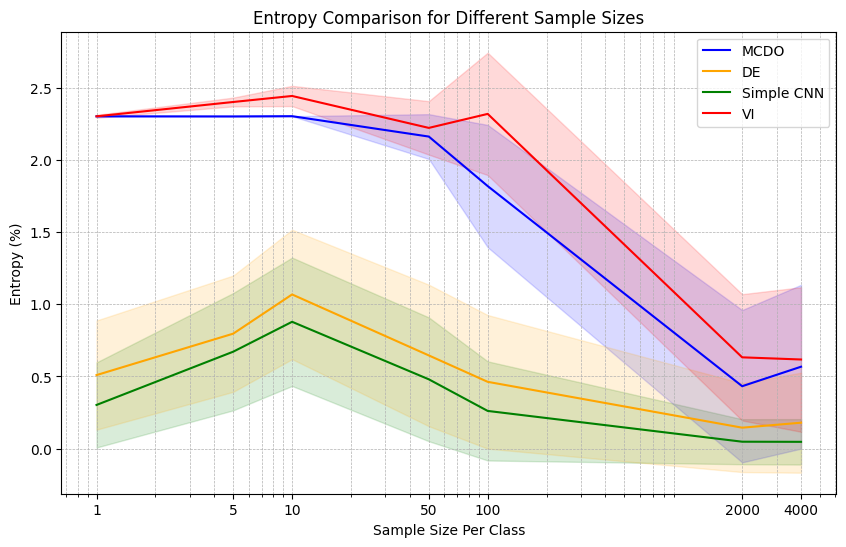

In [3]:
# Extract sample sizes
sample_sizes = [1, 5, 10, 50, 100, 2000, 4000]

model_0_entropies = [mean_entropy_data["BASE"][str(size)] for size in sample_sizes]
model_1_entropies = [mean_entropy_data["MCDO"][str(size)] for size in sample_sizes]
model_2_entropies = [mean_entropy_data["DE"][str(size)] for size in sample_sizes]
model_3_entropies = [mean_entropy_data["VI"][str(size)] for size in sample_sizes]

model_0_std = [std_entropy_data["BASE"][str(size)] for size in sample_sizes]
model_1_std = [std_entropy_data["MCDO"][str(size)] for size in sample_sizes]
model_2_std = [std_entropy_data["DE"][str(size)] for size in sample_sizes]
model_3_std = [std_entropy_data["VI"][str(size)] for size in sample_sizes]

# Calculate confidence intervals for Model 2
model_0_lower = np.array(model_0_entropies) - np.array(model_0_std)
model_0_upper = np.array(model_0_entropies) + np.array(model_0_std)
model_1_lower = np.array(model_1_entropies) - np.array(model_1_std)
model_1_upper = np.array(model_1_entropies) + np.array(model_1_std)
model_2_upper = np.array(model_2_entropies) + np.array(model_2_std)
model_2_lower = np.array(model_2_entropies) - np.array(model_2_std)
model_3_upper = np.array(model_3_entropies) + np.array(model_3_std)
model_3_lower = np.array(model_3_entropies) - np.array(model_3_std)

# Plotting
plt.figure(figsize=(10, 6))

# Plot Model 1
plt.plot(sample_sizes, model_1_entropies, label='MCDO', color='blue',linestyle='-')
# Plot Model 2 mean
plt.plot(sample_sizes, model_0_entropies, label='DE', color='orange', linestyle='-')
# Plot Model 0 mean
plt.plot(sample_sizes, model_2_entropies, label='Simple CNN', color='green', linestyle='-')
# Plot Model 3 mean
plt.plot(sample_sizes, model_3_entropies, label='VI', color='red', linestyle='-')
# Add confidence interval as shaded area for Model 2
plt.fill_between(sample_sizes, model_2_lower, model_2_upper, color='green', alpha=0.15)
plt.fill_between(sample_sizes, model_1_lower, model_1_upper, color='blue', alpha=0.15)
plt.fill_between(sample_sizes, model_0_lower, model_0_upper, color='orange', alpha=0.15)
plt.fill_between(sample_sizes, model_3_lower, model_3_upper, color='red', alpha=0.15)

# Add labels, title, and legend
plt.xlabel("Sample Size Per Class")
plt.ylabel("Entropy (%)")
plt.title("Entropy Comparison for Different Sample Sizes")
plt.xscale("log")  # Use log scale for better visualization
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.legend()
plt.xticks(sample_sizes, labels=sample_sizes)

# Save and show the plot
plt.savefig("entropy_plot.png", dpi=300, bbox_inches='tight')
plt.show()